In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer

In [6]:
df=pd.read_csv(r"C:\Users\user\Desktop\workspace\ML practice\Datasets\train.csv")[['Age','Fare','Survived']]

In [7]:
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [8]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Age         0
Fare        0
Survived    0
dtype: int64

In [11]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [15]:
kbin_age=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [21]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
],remainder='passthrough')

In [22]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

In [26]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.67,  6.2 , 16.  , 19.  , 21.  , 24.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 39.  , 42.  , 47.6 , 54.  , 80.  ])             ],
      dtype=object)

In [29]:
clf=DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)

DecisionTreeClassifier()

In [30]:
y_pred=clf.predict(x_test_trf)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,y_pred)

0.6372093023255814

In [33]:
clf2=DecisionTreeClassifier()
clf2.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
y_pred2=clf2.predict(x_test)

In [35]:
accuracy_score(y_test,y_pred)

0.6372093023255814

In [36]:
#applying the binarization
from sklearn.preprocessing import Binarizer

In [ ]:
trf=ColumnTransformer([
    ('bin',Binarizer(),[])
])

In [38]:
df=pd.read_csv(r'C:\Users\user\Desktop\workspace\ML practice\Datasets\testtrain.csv')

In [39]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [40]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

In [42]:
len(df['Ticket'].unique())

681

In [46]:
df.shape

(891, 4)

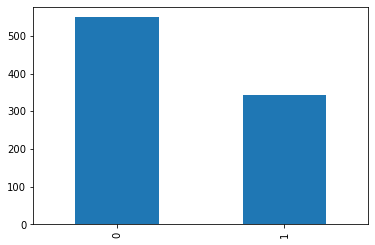

In [49]:
fig=df['Survived'].value_counts().plot.bar()

In [51]:
df['number_numerical']=pd.to_numeric(df['number'],errors='coerce',downcast='integer')

In [52]:
df['number_categorial']=np.where(df['number_numerical'].isnull(),df['number'],np.nan)

In [53]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorial
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A
